In [ ]:
# Import require library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
# import dataset.
data =pd.read_csv('/content/superstore.csv', encoding='latin-1')

In [ ]:
#Converting dataset into dataframe
df = pd.DataFrame(data)

In [ ]:
# Show first 5 rows of table
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# conuting rows and columns
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Determine the missing Values
missing_values = df.isnull().sum()
print(missing_values)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Most Selling Products
most_selling_products = df['Product Name'].value_counts().head(10)
print(most_selling_products)

Product Name
Staple envelope                               48
Staples                                       46
Easy-staple paper                             46
Avery Non-Stick Binders                       20
Staples in misc. colors                       19
KI Adjustable-Height Table                    18
Staple remover                                18
Storex Dura Pro Binders                       17
Staple-based wall hangings                    16
Situations Contoured Folding Chairs, 4/Set    15
Name: count, dtype: int64


In [ ]:
# top 10 products by sales
top10_product_by_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top10_product_by_sales)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [ ]:
# Converting order data into year, month, day
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['year']= df['Order Date'].dt.year
df['month']= df['Order Date'].dt.month
df['day']= df['Order Date'].dt.day
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,day
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


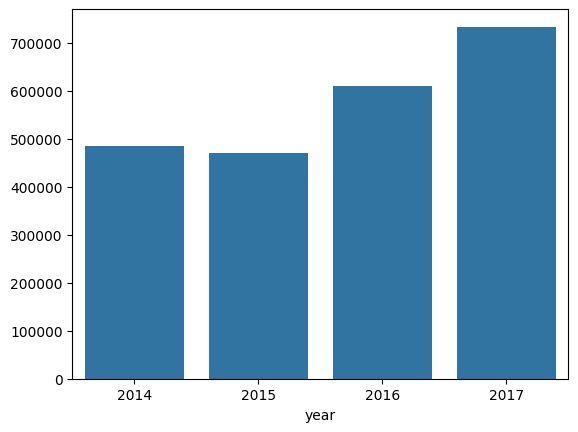

In [ ]:
# Total Sales Per year
Sales_Per_year = df.groupby('year')['Sales'].sum()
print(Sales_Per_year)
sns.barplot(x=Sales_Per_year.index, y=Sales_Per_year.values)
plt.show()

year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64


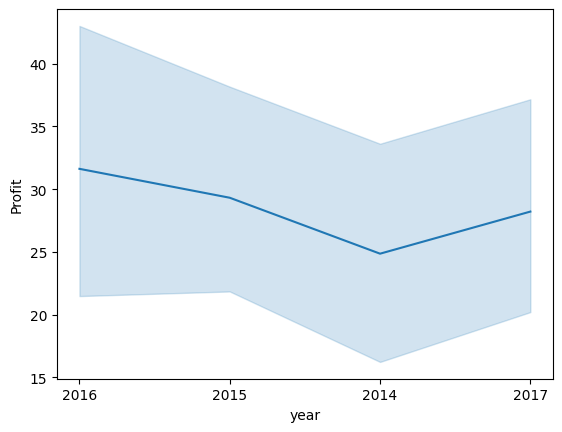

In [ ]:
#Comparing profit over a year
profit_per_year = df.groupby('year')['Profit'].sum()
print(profit_per_year)
df['year'] = df['year'].astype(str)
sns.lineplot(x='year', y='Profit' ,data=df)
plt.show()

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


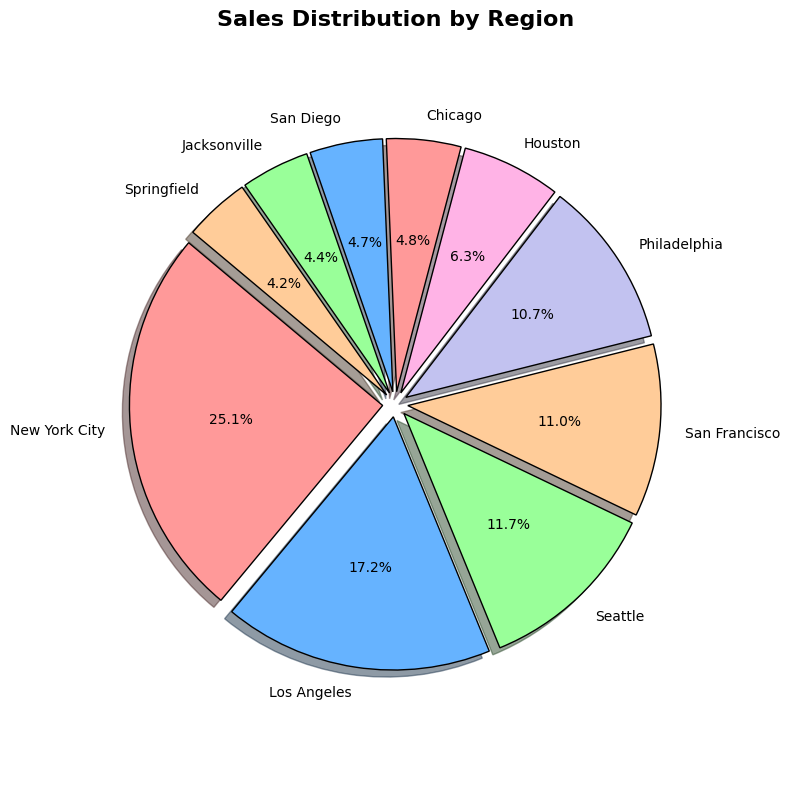

In [ ]:
#top 10 country by sales
sales_by_region = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print(top10_country_by_sales)
labels = sales_by_region.index
sizes = sales_by_region.values

# Optional: Custom colors (you can use your own palette)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = [0.05]*len(labels)  # explode all slightly for pop-out effect

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes,
        labels=labels,
        colors=colors[:len(labels)],
        explode=explode,
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title("Sales Distribution by Region", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio makes the pie round
plt.tight_layout()
plt.show()

In [ ]:

# Pivot Table
import pandas as pd

# Pivot table: total sales for each category & subcategory
pivot_table = pd.pivot_table(df,
                              index='Category',
                              columns='Sub-Category',
                              values='Sales',
                              aggfunc='sum',
                              fill_value=0)

# Display the pivot table
pivot_table


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0.000,0.000,0.000,0.000,114879.9963,328449.103,0.00,0.000,0.00,91705.164,0.000,0.000,0.000,0.000,0.000,0.000,206965.532
Office Supplies,0.000,107532.161,27118.792,203412.733,0.0000,0.000,0.00,16476.402,3024.28,0.000,12486.312,0.000,78479.206,0.000,223843.608,46673.538,0.000
Technology,167380.318,0.000,0.000,0.000,0.0000,0.000,149528.03,0.000,0.00,0.000,0.000,189238.631,0.000,330007.054,0.000,0.000,0.000
